# SVM(Support Vector Machine)
- support vector : 그룹을 나눌 때 회귀선에서 가장 가까운 벡터

> convergence : 수렴하다.   
> 인공지능에서는 예측값(^)이 정답값에 수렴해야만 사용할 수 있다.(*)

### SVM을 활용한 비만도(BMI) 측정 예측
- BMI = 몸무게(kg) / 키(m) * 키(m)
- BMI가 18.5 이상 25 미만일 때 표준 몸무게

In [60]:
# 데이터를 획득하기 위해 '무작위'로 2만 명 데이터를 생성
# 키(cm), 몸무게(kg), Label(저체중:thin, 정상체중:normal, 비만:fat)의 csv 생성

import random

# BMI를 계산해서 Label을 return하는 함수
def calc_bmi(height, weight):
    bmi = weight / (height/100) ** 2
    if bmi < 18.5: return 'thin'
    if bmi < 25 : return 'normal'
    return 'fat'

# 저장 파일 준비하기
fp = open('../data/bmi.csv', 'w', encoding='utf-8') # w : write
fp.write('height,weight,label\r\n') # 한 줄 적어둠, header

# 무작위로 데이터 생성하기
cnt = {'thin':0, 'normal':0, 'fat':0}

for i in range(20000):
    height = random.randint(140, 190)
    weight = random.randint(35, 85)
    label = calc_bmi(height, weight)
    cnt[label] += 1
    fp.write('{0},{1},{2}\r\n'.format(height,weight,label))
fp.close()
print('ok :', cnt)

ok : {'thin': 6387, 'normal': 6849, 'fat': 6764}


### BMI 공식을 사용하지 않고 BMI 예측

In [61]:
import pandas as pd

In [62]:
# 데이터 불러오기
tbl = pd.read_csv('../data/bmi.csv')
tbl.head()

,height,weight,label
0,184,53,thin
1,175,41,thin
2,155,54,normal
3,160,46,thin
4,152,36,thin


In [63]:
# 컬럼을 분리하여 정규화하기
tbl.describe()

,height,weight
count,20000.000000,20000.000000
mean,165.021700,60.053450
std,14.715891,14.776617
min,140.000000,35.000000
25%,152.000000,47.000000
50%,165.000000,60.000000
75%,178.000000,73.000000
max,190.000000,85.000000


In [64]:
tbl['label']

0          thin
1          thin
2        normal
3          thin
4          thin
          ...  
19995    normal
19996      thin
19997      thin
19998       fat
19999       fat
Name: label, Length: 20000, dtype: object

In [65]:
label = tbl['label']
w = tbl['weight'] / tbl.weight.max()
h = tbl['height'] / tbl.height.max()

In [66]:
data = pd.DataFrame({'weight':w, 'height':h})
data

,weight,height
0,0.623529,0.968421
1,0.482353,0.921053
2,0.635294,0.815789
3,0.541176,0.842105
4,0.423529,0.800000
...,...,...
19995,0.835294,0.900000
19996,0.600000,0.942105
19997,0.458824,0.931579
19998,0.847059,0.857895


In [67]:
label

0          thin
1          thin
2        normal
3          thin
4          thin
          ...  
19995    normal
19996      thin
19997      thin
19998       fat
19999       fat
Name: label, Length: 20000, dtype: object

In [68]:
# 학습용과 훈련용으로 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_label, test_label = train_test_split(data, label, stratify=label)

In [69]:
from sklearn.svm import SVC

clf = SVC()

In [70]:
clf.fit(train_input, train_label)

SVC()

In [71]:
clf.score(test_input, test_label)

0.9936

In [72]:
from sklearn import metrics

In [73]:
print(metrics.classification_report(test_label, clf.predict(test_input)))

              precision    recall  f1-score   support

         fat       0.99      1.00      1.00      1691
      normal       0.99      0.99      0.99      1712
        thin       0.99      0.99      0.99      1597

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



In [74]:
tbl = pd.read_csv('../data/bmi.csv', index_col=2)
tbl.head()

,height,weight
label,,
thin,184,53
thin,175,41
normal,155,54
thin,160,46
thin,152,36


In [75]:
# 시각화 해보기
import matplotlib.pyplot as plt

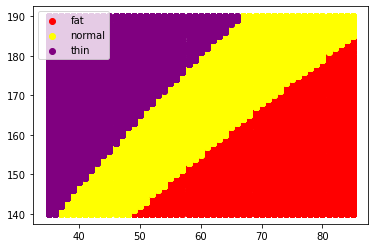

In [76]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b['weight'], b['height'], c=color, label=lbl)

scatter('fat','red')
scatter('normal','yellow')
scatter('thin','purple')

ax.legend()

plt.savefig('../data/bmi_test.png')

---
# SVM의 종류
- SVC(Classification)
- NuSVC : SVC와 같다
- LinearSVC : SVM 중에서 가장 빠름, SVC 대비 약 3배 정도 빠름

In [77]:
clf = svm.LinearSVC()

clf.fit(train_input, train_label)

LinearSVC()

In [78]:
clf.score(test_input, test_label)

0.939

In [79]:
print(metrics.classification_report(test_label, clf.predict(test_input)))

              precision    recall  f1-score   support

         fat       0.92      1.00      0.96      1691
      normal       1.00      0.83      0.90      1712
        thin       0.91      1.00      0.95      1597

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000

